<a href="https://colab.research.google.com/github/8066-asad/Analysis-of-CO2-Global-Emissions-per-day-using-SQL/blob/main/Analysis_of_Co2_Emissions_with_SQL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving carbon-monitor-GLOBAL-maingraphdatas.xlsx to carbon-monitor-GLOBAL-maingraphdatas (2).xlsx
Loading data...
Data loaded: 66303 rows
Database created successfully!

ANALYSIS 1: OVERALL EMISSIONS LANDSCAPE

1.1 Top Countries by Total Emissions:
       country  total_emissions_mt  sector_count  avg_daily_emissions_mt  emission_rank  pct_of_global
         China            26461.46             6                  5.1885              1          29.76
           ROW            25554.31             6                  5.0106              2          28.74
 United States            11672.10             6                  2.2886              3          13.13
         India             6975.21             6                  1.3677              4           7.84
     EU27 & UK             6898.79             6                  1.3527              5           7.76
        Russia             3875.83             6                  0.7600              6           4.36
         Japan             240

/tmp/ipython-input-18-115310909.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='total_emissions_mt', data=result_1_1, ax=ax1, palette='viridis')


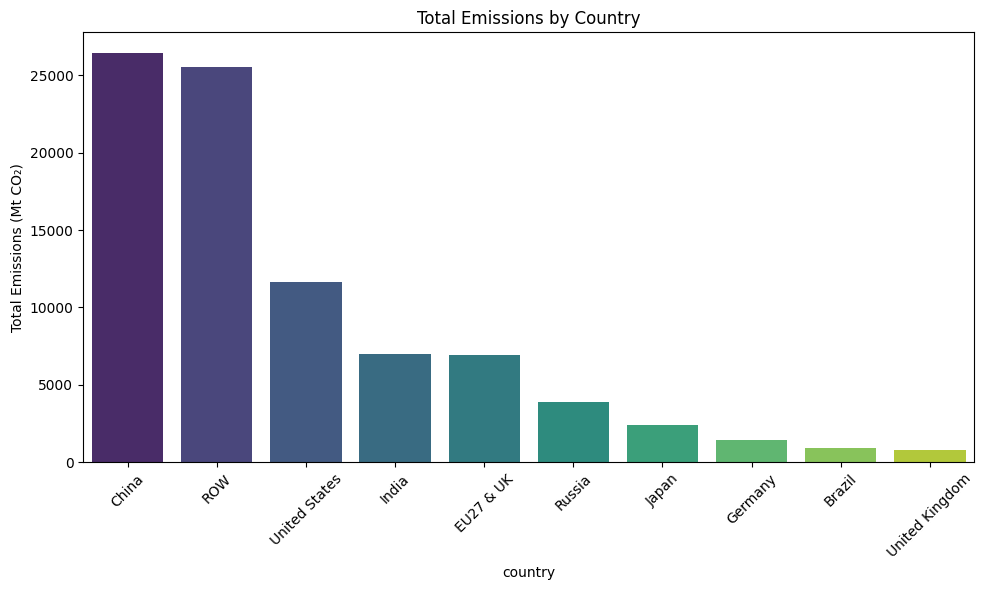


ANALYSIS 2: TEMPORAL TRENDS AND PATTERNS

2.1 Year-over-Year Emission Changes:
country                 sector year  annual_emissions_mt  prev_year_emissions_mt  yoy_growth_rate
 Brazil      Domestic Aviation 2024                11.27                   11.12             1.40
 Brazil      Domestic Aviation 2025                 3.99                   11.27           -64.64
 Brazil       Ground Transport 2024               165.35                  168.01            -1.59
 Brazil       Ground Transport 2025                53.59                  165.35           -67.59
 Brazil               Industry 2024               131.87                  127.52             3.41
 Brazil               Industry 2025                41.78                  131.87           -68.32
 Brazil International Aviation 2024                 3.26                    2.93            11.22
 Brazil International Aviation 2025                 1.16                    3.26           -64.34
 Brazil                  Power 2024   

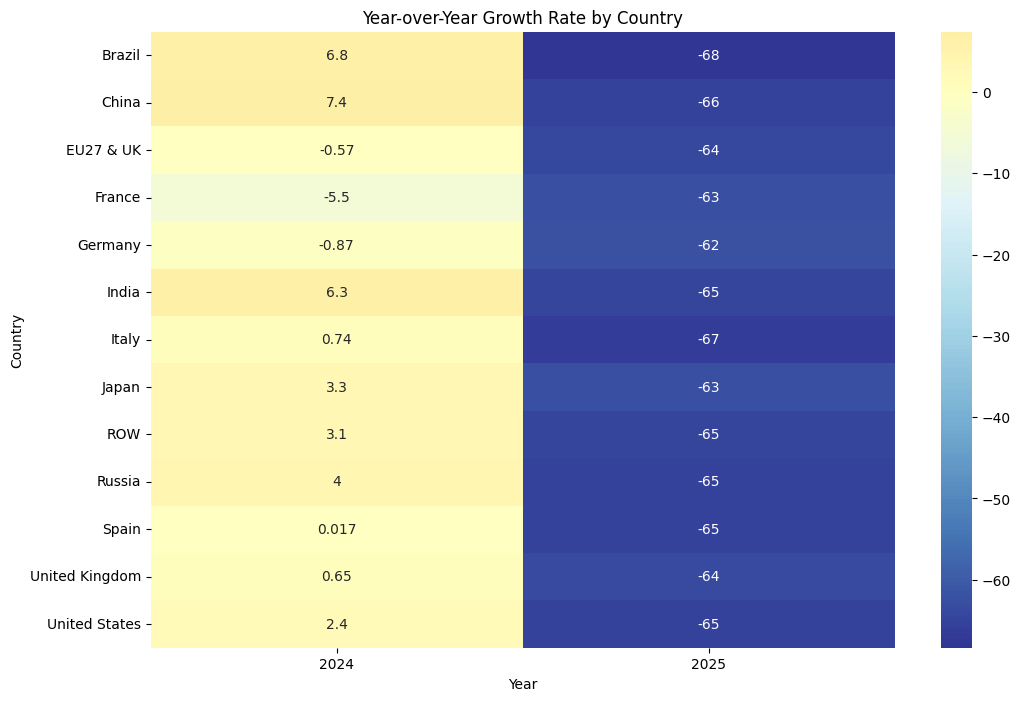


ANALYSIS 3: ADVANCED TREND ANALYSIS

3.1 Countries with Most Dramatic Changes:
       country                 sector  emissions_2023  emissions_2024  emissions_2025_partial  growth_2023_to_2024       trend_category
         China International Aviation       13.199516       18.440320                6.487482                39.70 Significant Increase
        France                  Power       22.165416       13.889704                6.506245               -37.34 Significant Decrease
        Brazil                  Power       52.737605       66.576461               14.195024                26.24 Significant Increase
         Spain                  Power       36.668171       28.365527                9.139044               -22.64 Significant Decrease
         Japan International Aviation        7.578980        8.972640                3.103379                18.39 Significant Increase
United Kingdom                  Power       56.128419       46.160850               19.988460           

/tmp/ipython-input-18-115310909.py:232: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='count', y='trend_category', data=trend_counts, palette='viridis')


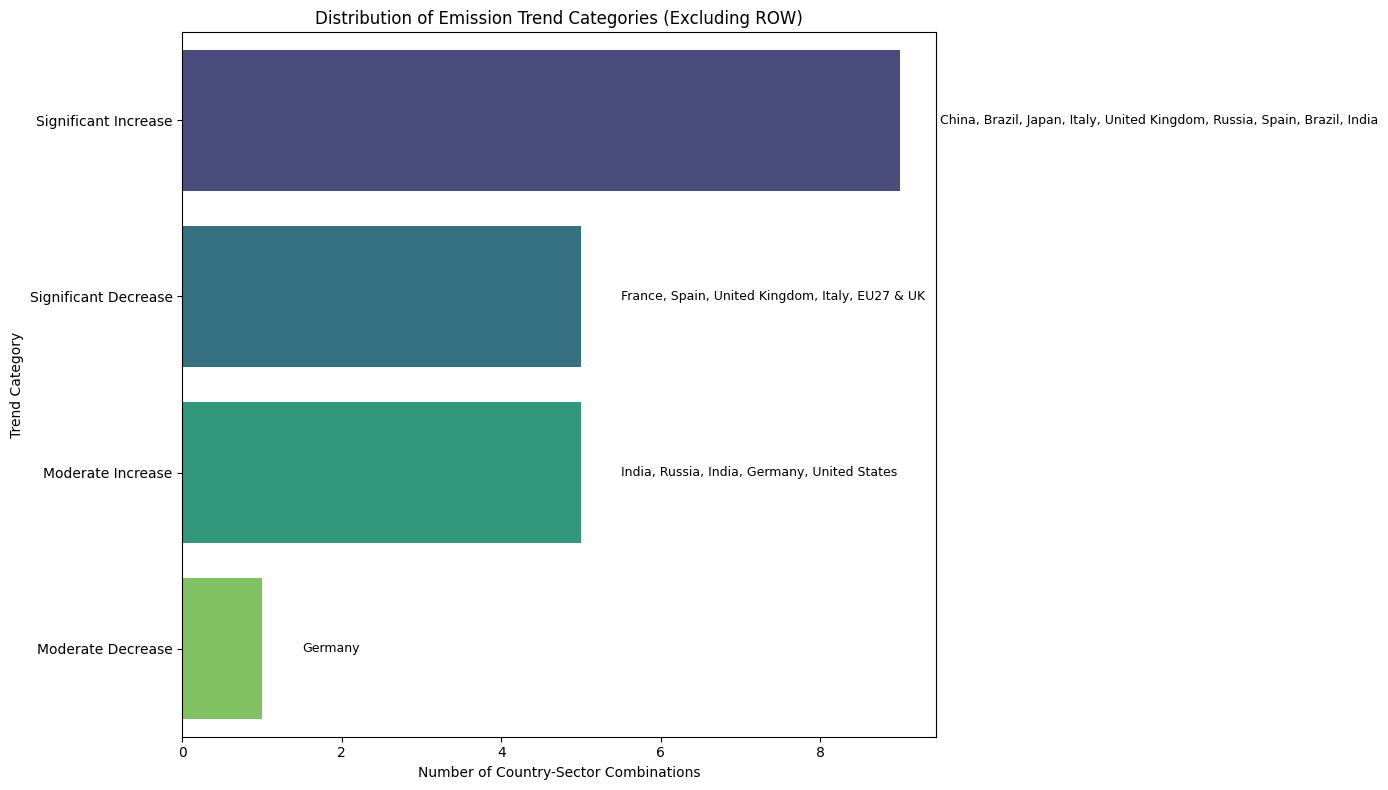


ANALYSIS 4: TIME WINDOW ANALYSIS

4.1 Rolling Averages Analysis (Sample):
country sector       date  daily_emissions_mt  rolling_7day_avg_mt  deviation_from_avg
  China  Power 2023-01-01             17.3042              17.3042              0.0000
  China  Power 2023-01-02             17.3343              17.3193              0.0150
  China  Power 2023-01-03             17.5569              17.3985              0.1584
  China  Power 2023-01-04             17.6562              17.4629              0.1933
  China  Power 2023-01-05             17.3824              17.4468             -0.0644
  China  Power 2023-01-06             17.1147              17.3915             -0.2767
  China  Power 2023-01-07             16.9823              17.3330             -0.3507
  China  Power 2023-01-08             16.4619              17.2127             -0.7508
  China  Power 2023-01-09             16.3415              17.0708             -0.7293
  China  Power 2023-01-10             16.1400          

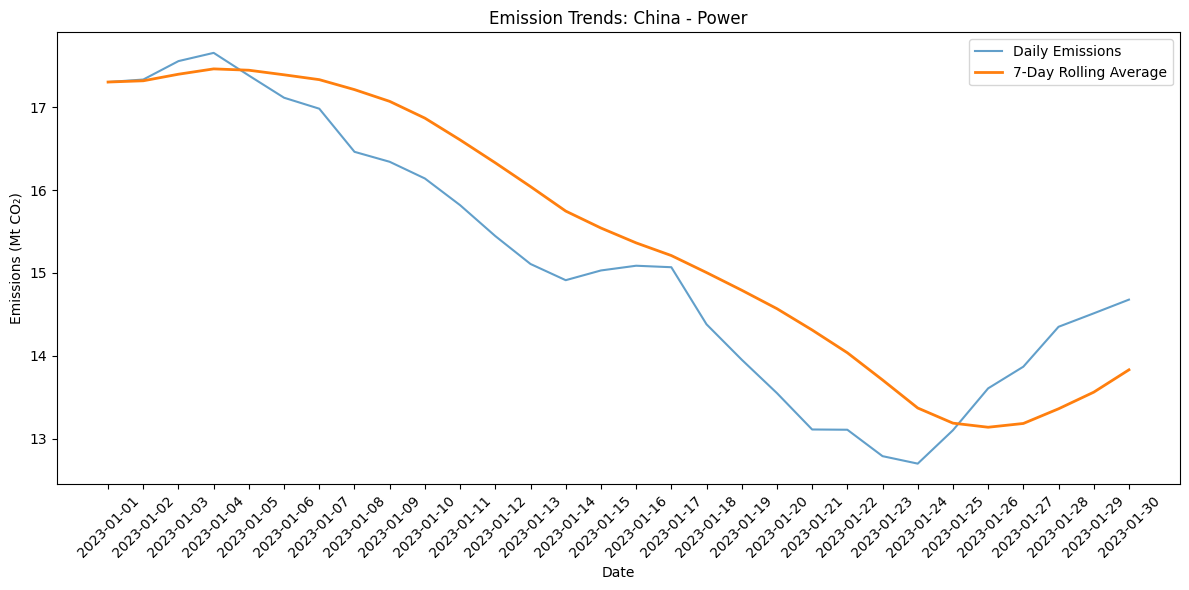


SUMMARY STATISTICS

Dataset Summary:
 total_records  unique_countries  unique_sectors  total_emissions  avg_daily_emissions  min_emission  max_emission start_date   end_date
         66303                15               6         88927.86               1.3413           0.0       19.7886 2023-01-01 2025-04-30

ANALYSIS COMPLETE
This analysis demonstrates advanced SQL concepts including:
• Complex CTEs and subqueries
• Window functions (LAG, RANK, ROW_NUMBER)
• Statistical analysis and rolling averages
• Temporal trend analysis
• Data categorization and ranking


In [18]:
# Carbon Emissions Analysis


# Install required packages
!pip install pandas matplotlib seaborn plotly openpyxl

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import numpy as np


# DATA SETUP AND LOADING
from google.colab import files
uploaded = files.upload()

# Load your data
print("Loading data...")

try:
    df = pd.read_excel('carbon-monitor-GLOBAL-maingraphdatas.xlsx')
except FileNotFoundError:
    print("Error: 'carbon-monitor-GLOBAL-maingraphdatas.xlsx' not found. Please upload the file or update the path.")
    # You might want to exit or handle this error appropriately
    raise

# Rename column for SQLite compatibility
df = df.rename(columns={'MtCO2 per day': 'MtCO2_per_day'})

# Convert 'date' column to datetime objects and format for SQLite
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')

print(f"Data loaded: {len(df)} rows")


# DATABASE SETUP


# Create SQLite database
conn = sqlite3.connect(':memory:')  # In-memory database
df.to_sql('carbon_emissions', conn, if_exists='replace', index=False)

print("Database created successfully!")

# QUERY 1: OVERALL EMISSIONS LANDSCAPE


print("\n" + "="*50)
print("ANALYSIS 1: OVERALL EMISSIONS LANDSCAPE")
print("="*50)

# Query 1.1: Top 10 countries by total emissions
query_1_1 = """
WITH country_totals AS (
    SELECT
        country,
        SUM(MtCO2_per_day) as total_emissions,
        COUNT(DISTINCT sector) as sector_count,
        AVG(MtCO2_per_day) as avg_daily_emissions
    FROM carbon_emissions
    GROUP BY country
),
country_rankings AS (
    SELECT
        country,
        total_emissions,
        sector_count,
        avg_daily_emissions,
        RANK() OVER (ORDER BY total_emissions DESC) as emission_rank,
        ROUND(total_emissions * 100.0 / SUM(total_emissions) OVER(), 2) as pct_of_global
    FROM country_totals
)
SELECT
    country,
    ROUND(total_emissions, 2) as total_emissions_mt,
    sector_count,
    ROUND(avg_daily_emissions, 4) as avg_daily_emissions_mt,
    emission_rank,
    pct_of_global
FROM country_rankings
WHERE emission_rank <= 10
ORDER BY emission_rank;
"""

result_1_1 = pd.read_sql_query(query_1_1, conn)
print("\n1.1 Top Countries by Total Emissions:")
print(result_1_1.to_string(index=False))


# Visualization for Query 1.1
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))

# Bar chart for total emissions (Improved)
sns.barplot(x='country', y='total_emissions_mt', data=result_1_1, ax=ax1, palette='viridis')
ax1.set_title('Total Emissions by Country')
ax1.set_ylabel('Total Emissions (Mt CO₂)')
ax1.tick_params(axis='x', rotation=45) # Rotate labels


plt.tight_layout()
plt.show()


# QUERY 2: TEMPORAL TRENDS


print("\n" + "="*50)
print("ANALYSIS 2: TEMPORAL TRENDS AND PATTERNS")
print("="*50)

# Query 2.1: Year-over-Year comparison
query_2_1 = """
WITH yearly_emissions AS (
    SELECT
        country,
        sector,
        strftime('%Y', date) as year,
        SUM(MtCO2_per_day) as annual_emissions
    FROM carbon_emissions
    GROUP BY country, sector, strftime('%Y', date)
),
yoy_comparison AS (
    SELECT
        country,
        sector,
        year,
        annual_emissions,
        LAG(annual_emissions) OVER (PARTITION BY country, sector ORDER BY year) as prev_year_emissions
    FROM yearly_emissions
)
SELECT
    country,
    sector,
    year,
    ROUND(annual_emissions, 2) as annual_emissions_mt,
    ROUND(prev_year_emissions, 2) as prev_year_emissions_mt,
    ROUND(
        CASE
            WHEN prev_year_emissions > 0
            THEN (annual_emissions - prev_year_emissions) * 100.0 / prev_year_emissions
            ELSE NULL
        END, 2
    ) as yoy_growth_rate
FROM yoy_comparison
WHERE year > '2023' AND prev_year_emissions IS NOT NULL
ORDER BY country, sector, year;
"""

result_2_1 = pd.read_sql_query(query_2_1, conn)
print("\n2.1 Year-over-Year Emission Changes:")
print(result_2_1.head(10).to_string(index=False)) # Display table in a single line


# Visualization for YoY trends
pivot_yoy = result_2_1.pivot_table(
    index='country',
    columns='year',
    values='yoy_growth_rate',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_yoy, annot=True, cmap='RdYlBu_r', center=0)
plt.title('Year-over-Year Growth Rate by Country')
plt.ylabel('Country')
plt.xlabel('Year')
plt.show()


# QUERY 3: ADVANCED TREND ANALYSIS


print("\n" + "="*50)
print("ANALYSIS 3: ADVANCED TREND ANALYSIS")
print("="*50)

# Query 3.1: Countries with most dramatic changes
query_3_1 = """
WITH country_trend_analysis AS (
    SELECT
        country,
        sector,
        MIN(date) AS first_date,
        MAX(date) AS last_date,
        SUM(CASE WHEN date < '2024-01-01' THEN MtCO2_per_day ELSE 0 END) AS emissions_2023,
        SUM(CASE WHEN date >= '2024-01-01' AND date < '2025-01-01' THEN MtCO2_per_day ELSE 0 END) AS emissions_2024,
        SUM(CASE WHEN date >= '2025-01-01' THEN MtCO2_per_day ELSE 0 END) AS emissions_2025_partial
    FROM carbon_emissions
    GROUP BY country, sector
),
trend_calculations AS (
    SELECT
        country,
        sector,
        emissions_2023,
        emissions_2024,
        emissions_2025_partial,
        ROUND((emissions_2024 - emissions_2023) * 100.0 / emissions_2023, 2) AS growth_2023_to_2024,
        CASE
            WHEN (emissions_2024 - emissions_2023) * 1.0 / emissions_2023 < -0.1 THEN 'Significant Decrease'
            WHEN (emissions_2024 - emissions_2023) * 1.0 / emissions_2023 < -0.05 THEN 'Moderate Decrease'
            WHEN (emissions_2024 - emissions_2023) * 1.0 / emissions_2023 < 0.05 THEN 'Stable'
            WHEN (emissions_2024 - emissions_2023) * 1.0 / emissions_2023 < 0.1 THEN 'Moderate Increase'
            ELSE 'Significant Increase'
        END AS trend_category
    FROM country_trend_analysis
)
SELECT *
FROM trend_calculations
WHERE ABS(growth_2023_to_2024) > 5 AND country != 'ROW'
ORDER BY ABS(growth_2023_to_2024) DESC
LIMIT 20;

"""

result_3_1 = pd.read_sql_query(query_3_1, conn)
print("\n3.1 Countries with Most Dramatic Changes:")
print(result_3_1.to_string(index=False)) # Display table in a single line

# Visualization for trend categories with country names (Improved)
plt.figure(figsize=(14, 8)) # Increased figure size

# Count the occurrences of each trend category
trend_counts = result_3_1['trend_category'].value_counts().reset_index()
trend_counts.columns = ['trend_category', 'count']

# Create the bar plot
ax = sns.barplot(x='count', y='trend_category', data=trend_counts, palette='viridis')

plt.title('Distribution of Emission Trend Categories (Excluding ROW)')
plt.xlabel('Number of Country-Sector Combinations')
plt.ylabel('Trend Category')

# Add country names as text labels next to bars
for index, row in trend_counts.iterrows():
    category = row['trend_category']
    count = row['count']
    # Filter the original result_3_1 to get countries for this category
    countries_in_category = result_3_1[result_3_1['trend_category'] == category]['country'].tolist()
    # Create a single label with all countries for this category
    label_text = ", ".join(countries_in_category)
    # Position the text label next to the bar
    ax.text(count + 0.5, index, label_text, va='center', fontsize=9)


plt.tight_layout()
plt.show()

# QUERY 4: TIME WINDOW ANALYSIS


print("\n" + "="*50)
print("ANALYSIS 4: TIME WINDOW ANALYSIS")
print("="*50)

# Query 4.1: Rolling averages for country+sector with most emissions
query_4_1 = """
WITH total_emissions_by_country_sector AS (
    SELECT
        country,
        sector,
        SUM(MtCO2_per_day) as total_emissions
    FROM carbon_emissions
    GROUP BY country, sector
    ORDER BY total_emissions DESC
    LIMIT 1
),
daily_data AS (
    SELECT
        ce.country,
        ce.sector,
        ce.date,
        ce.MtCO2_per_day,
        AVG(ce.MtCO2_per_day) OVER (
            PARTITION BY ce.country, ce.sector
            ORDER BY ce.date
            ROWS BETWEEN 6 PRECEDING AND CURRENT ROW
        ) as rolling_7day_avg
    FROM carbon_emissions ce
    JOIN total_emissions_by_country_sector top_cs ON ce.country = top_cs.country AND ce.sector = top_cs.sector
)
SELECT
    country,
    sector,
    date,
    ROUND(MtCO2_per_day, 4) as daily_emissions_mt,
    ROUND(rolling_7day_avg, 4) as rolling_7day_avg_mt,
    ROUND(MtCO2_per_day - rolling_7day_avg, 4) as deviation_from_avg
FROM daily_data
ORDER BY country, sector, date
LIMIT 100;
"""

result_4_1 = pd.read_sql_query(query_4_1, conn)
print("\n4.1 Rolling Averages Analysis (Sample):")
print(result_4_1.head(10).to_string(index=False)) # Display table in a single line


# Time series visualization
if not result_4_1.empty:
    sample_country = result_4_1['country'].iloc[0]
    sample_sector = result_4_1['sector'].iloc[0]

    sample_data = result_4_1[
        (result_4_1['country'] == sample_country) &
        (result_4_1['sector'] == sample_sector)
    ].head(30)

    plt.figure(figsize=(12, 6))
    plt.plot(sample_data['date'], sample_data['daily_emissions_mt'],
             label='Daily Emissions', alpha=0.7)
    plt.plot(sample_data['date'], sample_data['rolling_7day_avg_mt'],
             label='7-Day Rolling Average', linewidth=2)
    plt.title(f'Emission Trends: {sample_country} - {sample_sector}')
    plt.xlabel('Date')
    plt.ylabel('Emissions (Mt CO₂)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for rolling average analysis.")


# SUMMARY STATISTICS


print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)

# Overall summary
summary_query = """
SELECT
    COUNT(*) as total_records,
    COUNT(DISTINCT country) as unique_countries,
    COUNT(DISTINCT sector) as unique_sectors,
    ROUND(SUM(MtCO2_per_day), 2) as total_emissions,
    ROUND(AVG(MtCO2_per_day), 4) as avg_daily_emissions,
    ROUND(MIN(MtCO2_per_day), 4) as min_emission,
    ROUND(MAX(MtCO2_per_day), 4) as max_emission,
    MIN(date) as start_date,
    MAX(date) as end_date
FROM carbon_emissions;
"""

summary_result = pd.read_sql_query(summary_query, conn)
print("\nDataset Summary:")
print(summary_result.to_string(index=False)) # Display table in a single line

# Close database connection
conn.close()

print("\n" + "="*50)
print("ANALYSIS COMPLETE")
print("="*50)
print("This analysis demonstrates advanced SQL concepts including:")
print("• Complex CTEs and subqueries")
print("• Window functions (LAG, RANK, ROW_NUMBER)")
print("• Statistical analysis and rolling averages")
print("• Temporal trend analysis")
print("• Data categorization and ranking")
